### Note: this PCW is incomplete. Hopefully I can clarify a few things in class and get started on Assignment 2 :)

* My main struggle was finding the distance of the next car; I think I will use Khan's suggestion of having two separate storage arrays for position and for velocity.

In [6]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab
from random import uniform, shuffle
import numpy as np

In [7]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.
    '''
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 0,
        (0, 1, 0): 0,
        (0, 1, 1): 1,
        (1, 0, 0): 1,
        (1, 0, 1): 1,
        (1, 1, 0): 0,
        (1, 1, 1): 1}
    '''
    def __init__(self, length, density, vmax, p, interactive=False):
        '''
        Initialize new TrafficSimulator objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton i.e. road length
           Default: 50

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. 
           Default: 0.2
           
         * vmax (int) The maximum velocity of a car. 
           Default: 5km/h
        
         * p (float) The probability of a car slowing down 
           Default: 0.2

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). 
           Default: False  
        '''
        self.interactive = interactive
        self.length = length
        self.density = density
        self.vmax = vmax 
        self.p = p

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.zeros(self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of cars in the array
        # equals the density parameter.
        
        cars_num = int(density * length)
        initial = [0] * cars_num + [-1] * (length - cars_num)
        shuffle(initial)
        
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        
        # Fill the road with empty cells and assign cars randomly according to traffic density
        # np.random.choice generates a uniform random sample of velocities from np.arange(6) of size 1

        self.current_state.fill(-1)  
        self.current_state[random_indices] = np.random.choice(6, 1)[0] 
        self.time = 0 

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure
        pylab.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = pylab.cm.binary)
        pylab.axis('image')
        pylab.title('density = ' + str(self.density) + '; t = ' + str(self.time))
        if not self.interactive:
            pylab.show()

    def step(self):
        '''
        Update the state of the cellular automaton according the 4 Nagal-Schreckenberg rules.
        '''
        # Update all cells in parallel, except the boundaries.
        for i in range(1, self.length - 1):
            vel = i
        
            # If the current cell is empty, do nothing:
            if vel == -1:
                return i   
        
            else:
                
                # Randomized slowing down:
                if random.random() < self.p:
                    vel = max(vel - 1, 0)

##############################
#### INCOMPLETE FROM HERE ####
##############################
                
                dist = 0

        
        # Find the distance to the next car
            dist = 0
            ind = 0
            for i in self.current_state[]:
                if ind == 0:
                    ind += 1
                    continue
                if i == NSEMPTY:
                    ind += 1
                    dist += 1
                    continue
                break
            
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density

SyntaxError: invalid syntax (<ipython-input-7-d52abe03aa2f>, line 124)

Initial state:


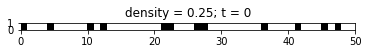

Next 5 states:


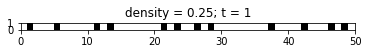

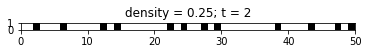

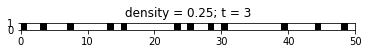

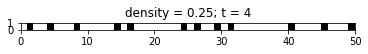

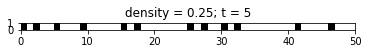


After 100 steps:


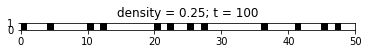

In [3]:
sim = TrafficSimulator(length=70, density=0.25, vmax=5, p=0.2, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.draw()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.draw()


### Next steps

* You have now seen the results for a single run of the simulator.
* Run the simulator multiple times, but using different settings of the density parameter.
* **Question:** If each black square represents a car and each white square represents open road, how does the state after 100 steps depend on the density parameter setting?
* Discuss with each other how the code works. In the next session you will be expected to write your own simulator of a cellular automaton, so make sure that you are comfortable with this Python implementation of a cellular automaton.